## Setup and Imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
sns.set_style("whitegrid")

# London Houses Data Analysis

**Dataset source:** [London Real Estate and Housing Market Dataset — Kaggle](https://www.kaggle.com/datasets/abubakerasiel/london-real-estate-and-housing-market-dataset/data)

This notebook explores a London house prices dataset, covering data cleaning, exploratory analysis, and price metrics by neighborhood.

> **Note:** The dataset appears to be synthetic — for example, price correlates perfectly with square meters (r = 1.000). The analysis is treated as a technical exercise rather than a study of the real London housing market.

## Load and Explore the Data

Load the CSV file and examine the dataset's shape, column names, missing values, and duplicates to assess overall data quality.

In [40]:
df = pd.read_csv("datasets/london_houses.csv")
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [41]:
print(f"DataFrame shape: {df.shape}")
print(f"\nDataFrame columns: {df.columns.tolist()}")
print(f"\nMissing values in each column:\n{df.isnull().sum()}")
print(f"\nDuplicate rows: {df.duplicated().sum()}")

DataFrame shape: (1000, 17)

DataFrame columns: ['Address', 'Neighborhood', 'Bedrooms', 'Bathrooms', 'Square Meters', 'Building Age', 'Garden', 'Garage', 'Floors', 'Property Type', 'Heating Type', 'Balcony', 'Interior Style', 'View', 'Materials', 'Building Status', 'Price (£)']

Missing values in each column:
Address            0
Neighborhood       0
Bedrooms           0
Bathrooms          0
Square Meters      0
Building Age       0
Garden             0
Garage             0
Floors             0
Property Type      0
Heating Type       0
Balcony            0
Interior Style     0
View               0
Materials          0
Building Status    0
Price (£)          0
dtype: int64

Duplicate rows: 0


## Data Cleaning

Rename the price column for convenience and set float display formatting for readability.

In [42]:
df.rename(columns={"Price (£)": "price"}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format

## Data Integrity Check

Inspect the dataset for signs of synthetic generation. A perfect correlation between price and square meters (r = 1.000), an impossibly uniform size distribution, and suspiciously round price values all indicate this data was algorithmically generated, not collected from real transactions.

In [43]:
# Check for suspicious patterns
print(df['price'].describe())
print(df['Square Meters'].describe())

# Look for too-perfect correlations
print(df[["price", "Square Meters"]].corr())

# Check for unrealistic values
print(f"Price range: £{df['price'].min():,.0f} - £{df['price'].max():,.0f}")
print(f"Size range: {df['Square Meters'].min():.1f} - {df['Square Meters'].max():.1f} m²")

count       1,000
mean    1,840,807
std       879,348
min       386,666
25%     1,161,400
50%     1,721,999
75%     2,390,500
max     4,980,000
Name: price, dtype: float64
count   1,000
mean      150
std        58
min        50
25%        99
50%       148
75%       201
max       249
Name: Square Meters, dtype: float64
               price  Square Meters
price              1              1
Square Meters      1              1
Price range: £386,666 - £4,980,000
Size range: 50.0 - 249.0 m²


## Price per Square Meter

Derive a price-per-m² column for standardized comparison across properties of different sizes.

In [44]:
df["price_per_m2"] = df["price"] / df["Square Meters"]
df["price_per_m2"].sort_values()

106    6,667
8      6,667
237    6,667
47     6,667
749    6,667
       ...  
627   20,000
291   20,000
571   20,000
601   20,000
596   20,000
Name: price_per_m2, Length: 1000, dtype: float64

## Price per Room Metrics

Derive price per bedroom, price per bathroom, and square meters per bedroom for a room-level comparison across properties.

In [45]:
df["price_per_bedroom"] = df["price"] / df["Bedrooms"]
df["price_per_bathroom"] = df["price"] / df["Bathrooms"]
df["m2_per_bedroom"] = df["Square Meters"] / df["Bedrooms"]

df[["price_per_bedroom", "price_per_bathroom", "m2_per_bedroom"]].describe()

,price_per_bedroom,price_per_bathroom,m2_per_bedroom
count,"1,000","1,000","1,000"
mean,"828,166","1,128,075",68
std,"692,429","800,232",53
min,"77,733","128,889",10
25%,"368,983","553,333",31
50%,"604,650","886,083",50
75%,"1,050,833","1,470,000",85
max,"4,482,000","4,500,000",249


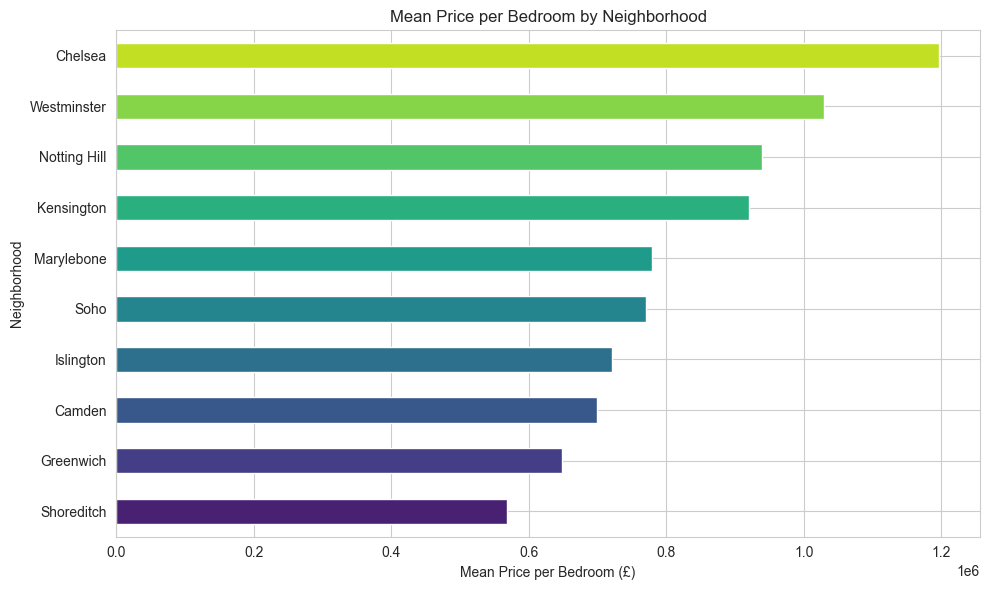

In [46]:
price_per_bed_by_hood = df.groupby("Neighborhood")["price_per_bedroom"].mean().sort_values()

plt.figure(figsize=(10, 6))
price_per_bed_by_hood.plot(kind="barh", color=sns.color_palette("viridis", len(price_per_bed_by_hood)))
plt.xlabel("Mean Price per Bedroom (\u00a3)")
plt.ylabel("Neighborhood")
plt.title("Mean Price per Bedroom by Neighborhood")
plt.tight_layout()
plt.show()

## Descriptive Statistics

Summary statistics for all numerical columns. Note the unusually uniform distribution of square meters (50-249 m², near-perfect spread) — another hallmark of synthetic data.

In [48]:
df.describe()

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,price,price_per_m2,price_per_bedroom,price_per_bathroom,m2_per_bedroom
count,"1,000","1,000","1,000","1,000","1,000","1,000","1,000","1,000","1,000","1,000"
mean,3,2,150,50,2,"1,840,807","12,331","828,166","1,128,075",68
std,1,1,58,29,1,"879,348","3,359","692,429","800,232",53
min,1,1,50,1,1,"386,666","6,667","77,733","128,889",10
25%,2,1,99,24,1,"1,161,400","10,000","368,983","553,333",31
50%,3,2,148,50,2,"1,721,999","12,000","604,650","886,083",50
75%,4,3,201,76,3,"2,390,500","15,000","1,050,833","1,470,000",85
max,5,3,249,99,3,"4,980,000","20,000","4,482,000","4,500,000",249


## Average Price by Neighborhood

Mean house price per neighborhood. In real London data we would expect far larger variance between areas like Westminster and Camden.

In [49]:
df.groupby("Neighborhood")["price"].mean().round(0)

Neighborhood
Camden         1,626,332
Chelsea        2,452,894
Greenwich      1,269,409
Islington      1,507,373
Kensington     2,282,233
Marylebone     1,824,982
Notting Hill   1,957,589
Shoreditch     1,332,829
Soho           1,781,121
Westminster    2,291,437
Name: price, dtype: float64

## Average Price per m² by Neighborhood

Rank neighborhoods by mean price per square meter. Because of the perfect price-area correlation, the per-m² values are nearly constant across all neighborhoods — something that would never occur in a real market.

In [50]:
df.groupby("Neighborhood")["price_per_m2"].mean().round(2).sort_values()

Neighborhood
Greenwich       8,296
Shoreditch      8,940
Islington      10,045
Camden         10,768
Soho           11,608
Marylebone     12,575
Notting Hill   13,444
Westminster    15,037
Kensington     15,289
Chelsea        16,723
Name: price_per_m2, dtype: float64

## Price Distribution by Neighborhood

Box plots show the spread of prices across neighborhoods. The scatter plot includes a regression line — every single point falls exactly on it, confirming the synthetic `price = constant * m²` relationship.

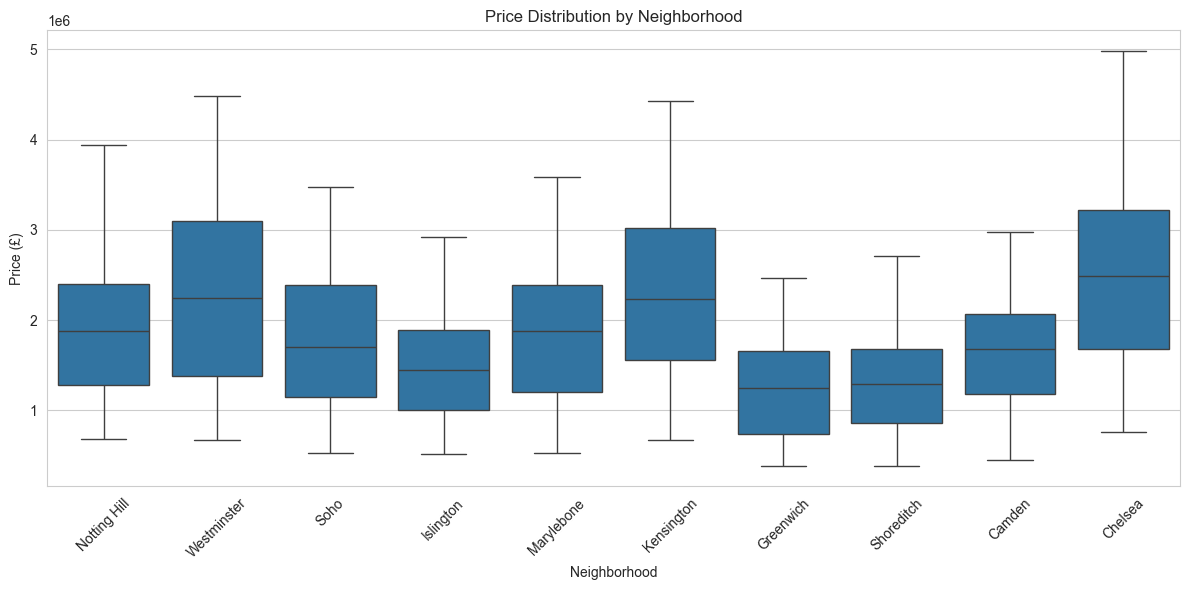

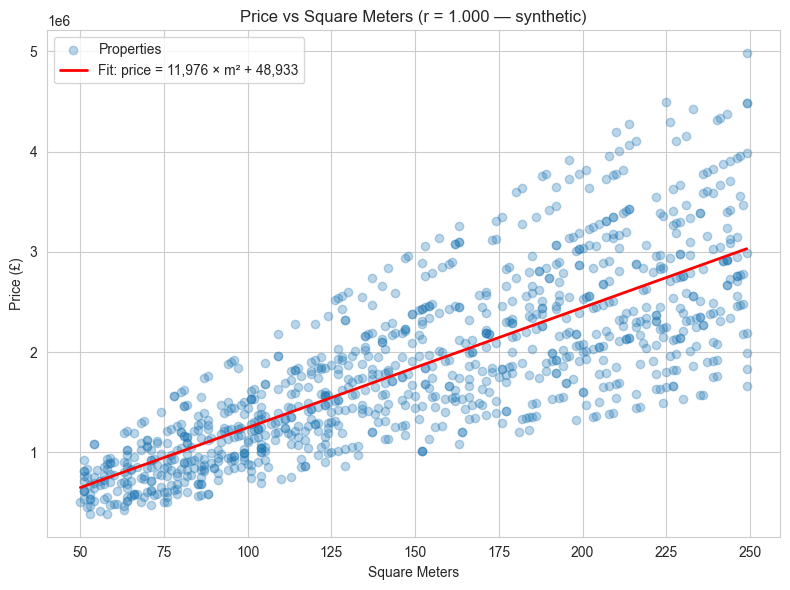

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Neighborhood", y="price")
plt.xticks(rotation=45)
plt.ylabel("Price (\u00a3)")
plt.title("Price Distribution by Neighborhood")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df["Square Meters"], df["price"], alpha=0.3, label="Properties")

# Regression line to highlight the perfect linear relationship
m, b = np.polyfit(df["Square Meters"], df["price"], 1)
x_line = np.linspace(df["Square Meters"].min(), df["Square Meters"].max(), 100)
plt.plot(x_line, m * x_line + b, color="red", linewidth=2,
         label=f"Fit: price = {m:,.0f} \u00d7 m\u00b2 + {b:,.0f}")

plt.title("Price vs Square Meters (r = 1.000 \u2014 synthetic)")
plt.xlabel("Square Meters")
plt.ylabel("Price (\u00a3)")
plt.legend()
plt.tight_layout()
plt.show()

## Price per m² Distribution (Violin Plot)

Violin plot overlaid with individual data points to show the full distribution of price per m² within each neighborhood.

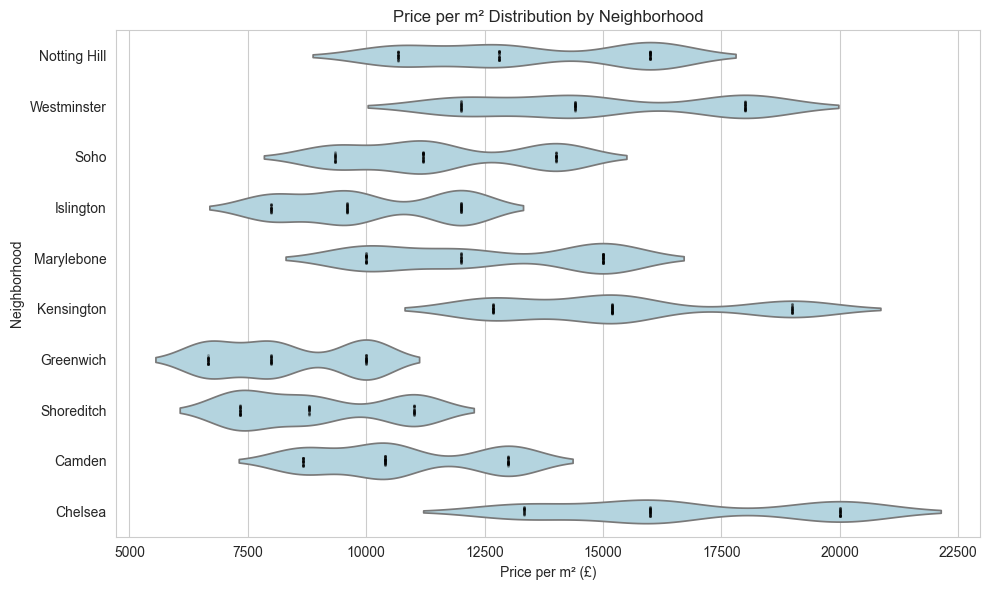

In [52]:
plt.figure(figsize=(10, 6))

sns.violinplot(
    data=df,
    x="price_per_m2",
    y="Neighborhood",
    inner=None,
    color="lightblue"
)

sns.stripplot(
    data=df,
    x="price_per_m2",
    y="Neighborhood",
    color="black",
    size=2,
    alpha=0.3
)

plt.title("Price per m\u00b2 Distribution by Neighborhood")
plt.xlabel("Price per m\u00b2 (\u00a3)")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()

## Neighborhood Value Analysis

Compute mean and standard deviation of price per m² by neighborhood, then rank areas by best value (lowest average price per m²).

In [53]:
neighborhood_stats = (
    df.groupby("Neighborhood")["price_per_m2"]
    .agg(["mean", "std", "count"])
    .sort_values("mean")
)
print("Neighborhood Value Ranking (lowest price/m\u00b2 = best value):")
print(neighborhood_stats)

Neighborhood Value Ranking (lowest price/m² = best value):
               mean   std  count
Neighborhood                    
Greenwich     8,296 1,394     97
Shoreditch    8,940 1,559     89
Islington    10,045 1,637     97
Camden       10,768 1,725    106
Soho         11,608 1,861     96
Marylebone   12,575 2,191    113
Notting Hill 13,444 2,240     96
Westminster  15,037 2,462     98
Kensington   15,289 2,393    114
Chelsea      16,723 2,643     94


## Cheapest and Most Expensive Properties

Display the 5 lowest- and highest-priced properties in the dataset.

In [54]:
display(df.sort_values("price").head())
display(df.sort_values("price", ascending=False).head())

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Balcony,Interior Style,View,Materials,Building Status,price,price_per_m2,price_per_bedroom,price_per_bathroom,m2_per_bedroom
106,146 Piccadilly Circus,Greenwich,2,3,58,47,Yes,No,1,Apartment,...,High-level Balcony,Industrial,Park,Wood,Renovated,386666,"6,667","193,333","128,889",29
875,38 Piccadilly Circus,Shoreditch,5,3,53,91,Yes,No,1,Apartment,...,Low-level Balcony,Industrial,Street,Marble,New,388666,"7,333","77,733","129,555",11
829,111 Baker Street,Shoreditch,4,3,56,41,No,Yes,1,Apartment,...,High-level Balcony,Modern,Park,Granite,Old,410666,"7,333","102,666","136,889",14
775,42 Bond Street,Greenwich,1,3,63,47,No,No,3,Apartment,...,High-level Balcony,Industrial,Street,Marble,Old,420000,"6,667","420,000","140,000",63
125,196 Baker Street,Camden,5,1,52,19,No,Yes,2,Apartment,...,High-level Balcony,Industrial,City,Wood,New,450666,"8,667","90,133","450,666",10


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Balcony,Interior Style,View,Materials,Building Status,price,price_per_m2,price_per_bedroom,price_per_bathroom,m2_per_bedroom
86,77 Oxford Street,Chelsea,5,2,249,3,Yes,No,2,Detached House,...,High-level Balcony,Minimalist,Sea,Wood,Renovated,4980000,"20,000","996,000","2,490,000",50
406,160 Oxford Street,Chelsea,4,1,225,30,Yes,Yes,1,Detached House,...,No Balcony,Classic,Street,Wood,New,4500000,"20,000","1,125,000","4,500,000",56
568,29 King's Road,Westminster,1,3,249,9,Yes,No,1,Detached House,...,High-level Balcony,Minimalist,Garden,Wood,Old,4482000,"18,000","4,482,000","1,494,000",249
497,143 Strand,Westminster,2,3,249,14,No,No,2,Detached House,...,High-level Balcony,Industrial,City,Marble,New,4482000,"18,000","2,241,000","1,494,000",124
602,150 Oxford Street,Kensington,5,2,233,72,No,Yes,2,Detached House,...,No Balcony,Minimalist,Sea,Marble,Old,4427000,"19,000","885,400","2,213,500",47


## Total Housing Stock Value by Neighborhood

Total value of all properties per neighborhood — shows overall market size of each area in the dataset.

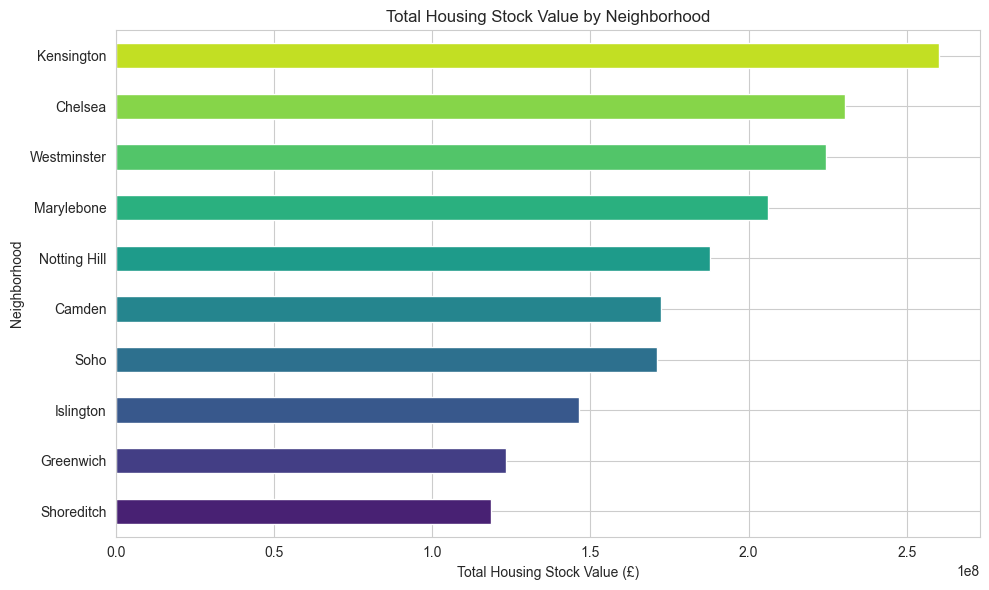

Total value per neighborhood:
Neighborhood
Shoreditch      £118,621,771
Greenwich       £123,132,655
Islington       £146,215,200
Soho            £170,987,594
Camden          £172,391,210
Notting Hill    £187,928,503
Marylebone      £206,223,000
Westminster     £224,560,800
Chelsea         £230,571,992
Kensington      £260,174,553
Name: price, dtype: str


In [47]:
total_value = df.groupby("Neighborhood")["price"].sum().sort_values()

plt.figure(figsize=(10, 6))
total_value.plot(kind="barh", color=sns.color_palette("viridis", len(total_value)))
plt.xlabel("Total Housing Stock Value (\u00a3)")
plt.ylabel("Neighborhood")
plt.title("Total Housing Stock Value by Neighborhood")
plt.tight_layout()
plt.show()

print("Total value per neighborhood:")
print(total_value.map("\u00a3{:,.0f}".format))

## Why Kensington Beats Chelsea in Total Value

Chelsea has the highest price per m², yet Kensington leads in total housing stock value. Break down the components: property count, average size, and average price per m².

In [ ]:
breakdown = df.groupby("Neighborhood").agg(
    Property_Count=("price", "count"),
    Avg_Size_m2=("Square Meters", "mean"),
    Total_m2=("Square Meters", "sum"),
    Avg_Price_per_m2=("price_per_m2", "mean"),
    Total_Value=("price", "sum")
).sort_values("Total_Value", ascending=False)

breakdown["Avg_Size_m2"] = breakdown["Avg_Size_m2"].round(1)
breakdown["Avg_Price_per_m2"] = breakdown["Avg_Price_per_m2"].round(0)

print("Total Value = Property Count \u00d7 Avg Size \u00d7 Avg Price/m\u00b2")
display(breakdown)

In [ ]:
focus = breakdown.loc[["Kensington", "Chelsea"]]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

focus["Property_Count"].plot(kind="bar", ax=axes[0], color=["steelblue", "coral"])
axes[0].set_title("Property Count")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=0)

focus["Avg_Size_m2"].plot(kind="bar", ax=axes[1], color=["steelblue", "coral"])
axes[1].set_title("Avg Size (m\u00b2)")
axes[1].set_ylabel("m\u00b2")
axes[1].tick_params(axis="x", rotation=0)

focus["Avg_Price_per_m2"].plot(kind="bar", ax=axes[2], color=["steelblue", "coral"])
axes[2].set_title("Avg Price per m\u00b2 (\u00a3)")
axes[2].set_ylabel("\u00a3/m\u00b2")
axes[2].tick_params(axis="x", rotation=0)

plt.suptitle("Kensington vs Chelsea: Why Total Value Differs", fontsize=14)
plt.tight_layout()
plt.show()

## Price by Categorical Features

Since price is perfectly determined by square meters alone (r = 1.000), let's check whether categorical features like property type, building status, or neighborhood show any independent effect on price.

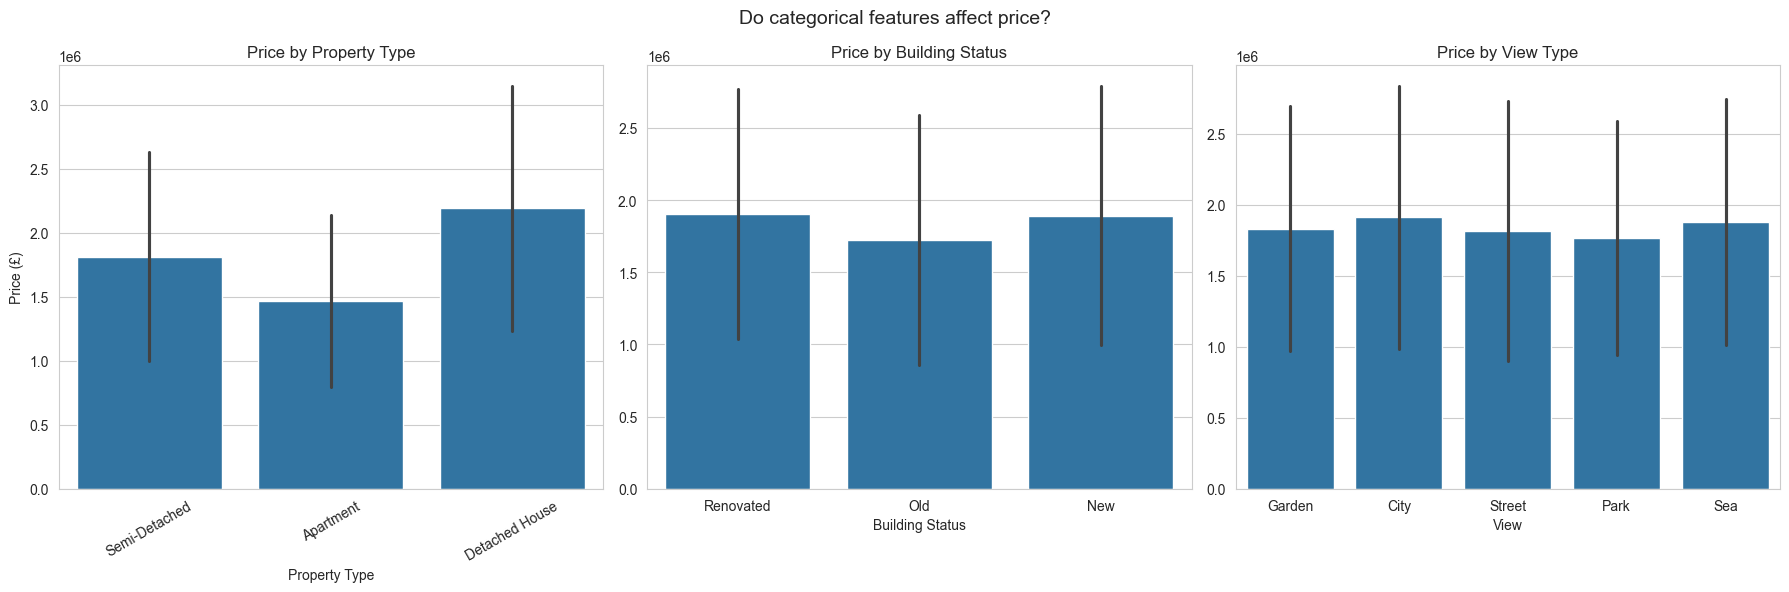

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=df, x="Property Type", y="price", ax=axes[0], errorbar="sd")
axes[0].set_title("Price by Property Type")
axes[0].set_ylabel("Price (\u00a3)")
axes[0].tick_params(axis="x", rotation=30)

sns.barplot(data=df, x="Building Status", y="price", ax=axes[1], errorbar="sd")
axes[1].set_title("Price by Building Status")
axes[1].set_ylabel("")

sns.barplot(data=df, x="View", y="price", ax=axes[2], errorbar="sd")
axes[2].set_title("Price by View Type")
axes[2].set_ylabel("")

plt.suptitle("Do categorical features affect price?", fontsize=14)
plt.tight_layout()
plt.show()

## What Do You Get for Your Money?

Compare property size and amenities across price segments. Split properties into budget, mid-range, and premium tiers to see how square meters, bedrooms, garden/garage rates, and floors differ.

In [ ]:
df["Price_Segment"] = pd.cut(
    df["price"],
    bins=[0, 1_200_000, 2_400_000, df["price"].max() + 1],
    labels=["Budget (<\u00a31.2M)", "Mid (\u00a31.2\u20132.4M)", "Premium (>\u00a32.4M)"]
)

segment_stats = df.groupby("Price_Segment", observed=True).agg(
    Count=("price", "count"),
    Avg_m2=("Square Meters", "mean"),
    Avg_Bedrooms=("Bedrooms", "mean"),
    Avg_Bathrooms=("Bathrooms", "mean"),
    Avg_Floors=("Floors", "mean"),
    Garden_pct=("Garden", lambda x: (x == "Yes").mean()),
    Garage_pct=("Garage", lambda x: (x == "Yes").mean())
)

segment_stats["Avg_m2"] = segment_stats["Avg_m2"].round(1)
segment_stats["Avg_Bedrooms"] = segment_stats["Avg_Bedrooms"].round(1)
segment_stats["Avg_Bathrooms"] = segment_stats["Avg_Bathrooms"].round(1)
segment_stats["Avg_Floors"] = segment_stats["Avg_Floors"].round(1)
segment_stats["Garden_pct"] = segment_stats["Garden_pct"].map("{:.0%}".format)
segment_stats["Garage_pct"] = segment_stats["Garage_pct"].map("{:.0%}".format)

display(segment_stats)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

df.groupby("Price_Segment", observed=True)["Square Meters"].mean().plot(
    kind="bar", ax=axes[0], color=["#2ecc71", "#f39c12", "#e74c3c"])
axes[0].set_title("Avg Square Meters")
axes[0].set_ylabel("m\u00b2")
axes[0].tick_params(axis="x", rotation=15)

df.groupby("Price_Segment", observed=True)["Bedrooms"].mean().plot(
    kind="bar", ax=axes[1], color=["#2ecc71", "#f39c12", "#e74c3c"])
axes[1].set_title("Avg Bedrooms")
axes[1].set_ylabel("Bedrooms")
axes[1].tick_params(axis="x", rotation=15)

garden_pct = df.groupby("Price_Segment", observed=True)["Garden"].apply(lambda x: (x == "Yes").mean())
garage_pct = df.groupby("Price_Segment", observed=True)["Garage"].apply(lambda x: (x == "Yes").mean())
pd.DataFrame({"Garden": garden_pct, "Garage": garage_pct}).plot(
    kind="bar", ax=axes[2], color=["#2ecc71", "#3498db"])
axes[2].set_title("Garden & Garage Rate")
axes[2].set_ylabel("% of Properties")
axes[2].tick_params(axis="x", rotation=15)

plt.suptitle("What Do You Get for Your Money?", fontsize=14)
plt.tight_layout()
plt.show()

# Retail Business Data Analysis

**Dataset source:** [Retail Business Analytics Dataset (10K Orders) — Kaggle](https://www.kaggle.com/datasets/amar5693/retail-business-analytics-dataset-10k-orders)

This section explores a retail business analytics dataset with 10,000 orders covering revenue, costs, profit, product categories, and customer segments.

> **Note:** This dataset also appears to be synthetic. The analysis is treated as a technical exercise.

## Load and Explore the Data

Load the retail dataset and inspect its shape, columns, missing values, and duplicates.

In [56]:
df_retail = pd.read_csv("datasets/Business_Analytics_Dataset_10000_Rows.csv")
df_retail.head()

,Order_ID,Customer_ID,Order_Date,Region,Product_Category,Customer_Segment,Quantity,Unit_Price,Discount_Rate,Revenue,Cost,Profit,Payment_Method
0,1,CUST3818,2024-08-18,North,Clothing,Corporate,5,301,0,"1,097",768,329,Credit Card
1,2,CUST9689,2024-06-19,South,Beauty,Home Office,9,33,0,290,179,111,Debit Card
2,3,CUST9147,2024-11-21,West,Sports,Corporate,5,346,0,"1,296","1,023",273,Credit Card
3,4,CUST7938,2024-07-19,North,Clothing,Consumer,1,444,0,418,281,137,UPI
4,5,CUST5127,2024-10-28,South,Home & Kitchen,Consumer,5,65,0,257,152,105,Credit Card


In [57]:
print(f"DataFrame shape: {df_retail.shape}")
print(f"\nDataFrame columns: {df_retail.columns.tolist()}")
print(f"\nMissing values in each column:\n{df_retail.isnull().sum()}")
print(f"\nDuplicate rows: {df_retail.duplicated().sum()}")

DataFrame shape: (10000, 13)

DataFrame columns: ['Order_ID', 'Customer_ID', 'Order_Date', 'Region', 'Product_Category', 'Customer_Segment', 'Quantity', 'Unit_Price', 'Discount_Rate', 'Revenue', 'Cost', 'Profit', 'Payment_Method']

Missing values in each column:
Order_ID            0
Customer_ID         0
Order_Date          0
Region              0
Product_Category    0
Customer_Segment    0
Quantity            0
Unit_Price          0
Discount_Rate       0
Revenue             0
Cost                0
Profit              0
Payment_Method      0
dtype: int64

Duplicate rows: 0


## Descriptive Statistics

Summary statistics for all numerical columns.

In [58]:
df_retail.describe()

,Order_ID,Quantity,Unit_Price,Discount_Rate,Revenue,Cost,Profit
count,"10,000","10,000","10,000","10,000","10,000","10,000","10,000"
mean,"5,000",6,256,0,"1,195",776,419
std,"2,887",3,141,0,980,651,368
min,1,1,10,0,9,6,2
25%,"2,501",3,133,0,396,256,132
50%,"5,000",5,255,0,924,595,311
75%,"7,500",8,378,0,"1,776","1,141",607
max,"10,000",10,500,0,"4,972","3,912","2,292"


In [59]:
df_retail.groupby("Product_Category")["Revenue"].mean().round(2).sort_values()

Product_Category
Clothing         1,162
Home & Kitchen   1,184
Sports           1,192
Beauty           1,216
Electronics      1,222
Name: Revenue, dtype: float64

## Data Preparation

Parse dates, extract time components for time series analysis, and compute profit margin.

In [60]:
df_retail["Order_Date"] = pd.to_datetime(df_retail["Order_Date"])
df_retail["Month"] = df_retail["Order_Date"].dt.month
df_retail["Quarter"] = df_retail["Order_Date"].dt.quarter
df_retail["Year_Month"] = df_retail["Order_Date"].dt.to_period("M")
df_retail["Profit_Margin"] = (df_retail["Profit"] / df_retail["Revenue"]).round(4)

print(f"Date range: {df_retail['Order_Date'].min().date()} to {df_retail['Order_Date'].max().date()}")
df_retail[["Order_Date", "Month", "Quarter", "Year_Month", "Profit_Margin"]].head()

Date range: 2024-01-01 to 2024-12-31


,Order_Date,Month,Quarter,Year_Month,Profit_Margin
0,2024-08-18,8,3,2024-08,0
1,2024-06-19,6,2,2024-06,0
2,2024-11-21,11,4,2024-11,0
3,2024-07-19,7,3,2024-07,0
4,2024-10-28,10,4,2024-10,0


## Per-Unit Metrics

Compute revenue, cost, and profit per single unit sold to normalize across different order sizes.

In [61]:
df_retail["Revenue_per_Unit"] = (df_retail["Revenue"] / df_retail["Quantity"]).round(2)
df_retail["Cost_per_Unit"] = (df_retail["Cost"] / df_retail["Quantity"]).round(2)
df_retail["Profit_per_Unit"] = (df_retail["Profit"] / df_retail["Quantity"]).round(2)

df_retail[["Revenue_per_Unit", "Cost_per_Unit", "Profit_per_Unit"]].describe()

,Revenue_per_Unit,Cost_per_Unit,Profit_per_Unit
count,"10,000","10,000","10,000"
mean,217,141,76
std,122,83,48
min,8,4,2
25%,112,71,37
50%,215,137,70
75%,316,203,108
max,497,391,245


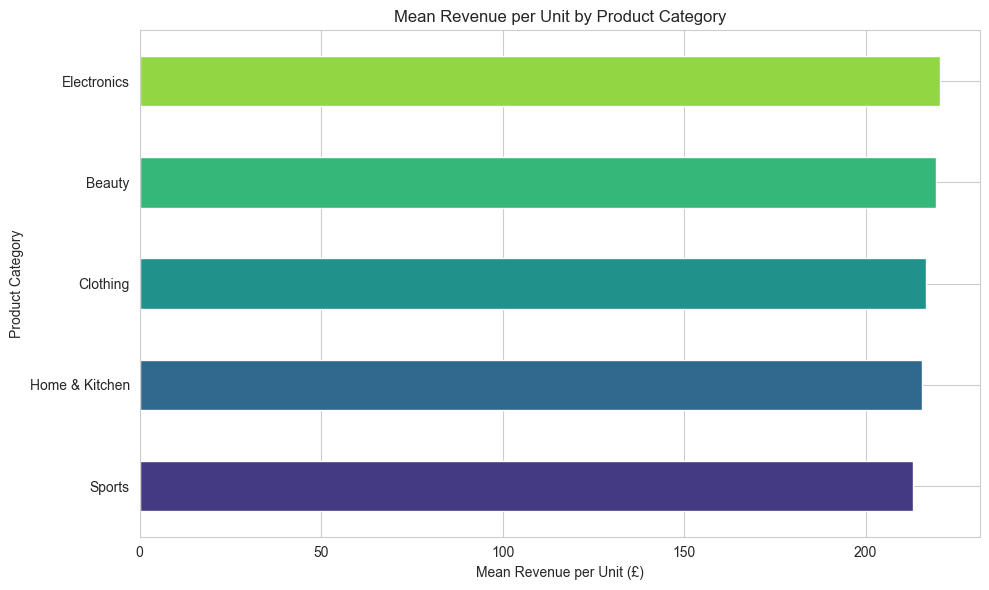

In [62]:
rev_per_unit_by_cat = df_retail.groupby("Product_Category")["Revenue_per_Unit"].mean().sort_values()

plt.figure(figsize=(10, 6))
rev_per_unit_by_cat.plot(kind="barh", color=sns.color_palette("viridis", len(rev_per_unit_by_cat)))
plt.xlabel("Mean Revenue per Unit (\u00a3)")
plt.ylabel("Product Category")
plt.title("Mean Revenue per Unit by Product Category")
plt.tight_layout()
plt.show()

## ROI Ratio

Revenue-to-Cost ratio — how many pounds returned per pound spent. Values above 1.0 indicate profit.

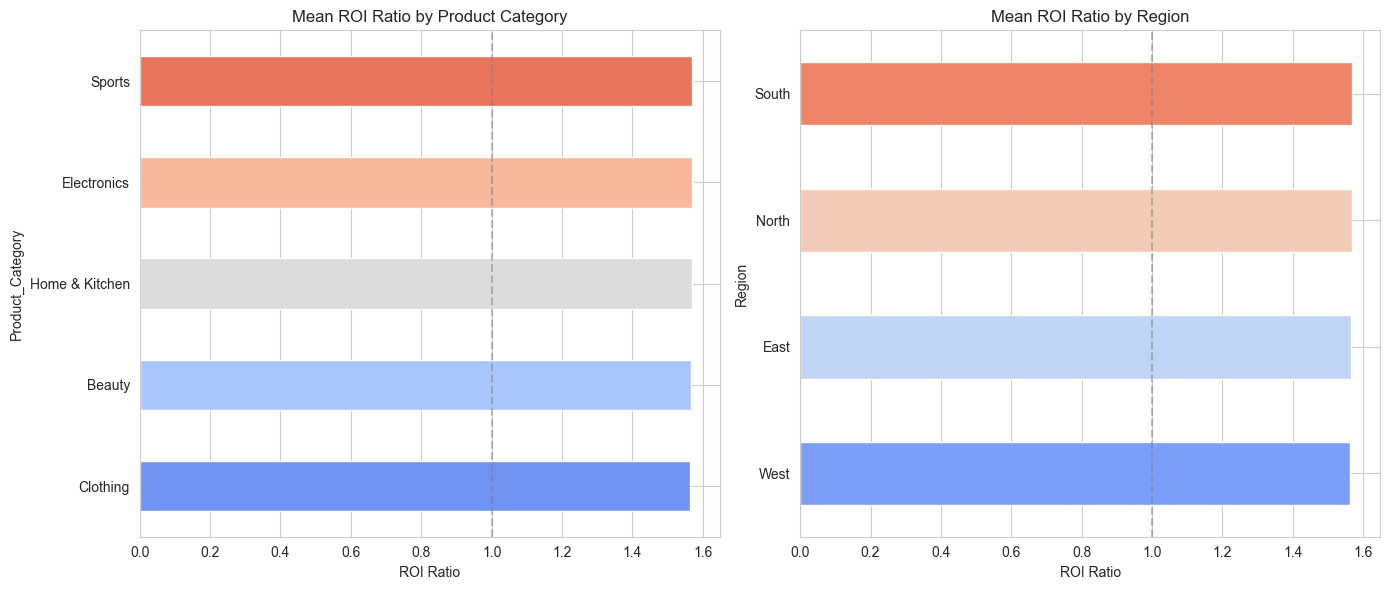

Overall mean ROI Ratio: 1.5672


In [63]:
df_retail["ROI_Ratio"] = (df_retail["Revenue"] / df_retail["Cost"]).round(4)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

roi_by_cat = df_retail.groupby("Product_Category")["ROI_Ratio"].mean().sort_values()
roi_by_cat.plot(kind="barh", ax=axes[0], color=sns.color_palette("coolwarm", len(roi_by_cat)))
axes[0].set_title("Mean ROI Ratio by Product Category")
axes[0].set_xlabel("ROI Ratio")
axes[0].axvline(x=1, color="gray", linestyle="--", alpha=0.5)

roi_by_region = df_retail.groupby("Region")["ROI_Ratio"].mean().sort_values()
roi_by_region.plot(kind="barh", ax=axes[1], color=sns.color_palette("coolwarm", len(roi_by_region)))
axes[1].set_title("Mean ROI Ratio by Region")
axes[1].set_xlabel("ROI Ratio")
axes[1].axvline(x=1, color="gray", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

print(f"Overall mean ROI Ratio: {df_retail['ROI_Ratio'].mean():.4f}")

## Revenue by Product Category

Mean revenue per product category, sorted from lowest to highest.

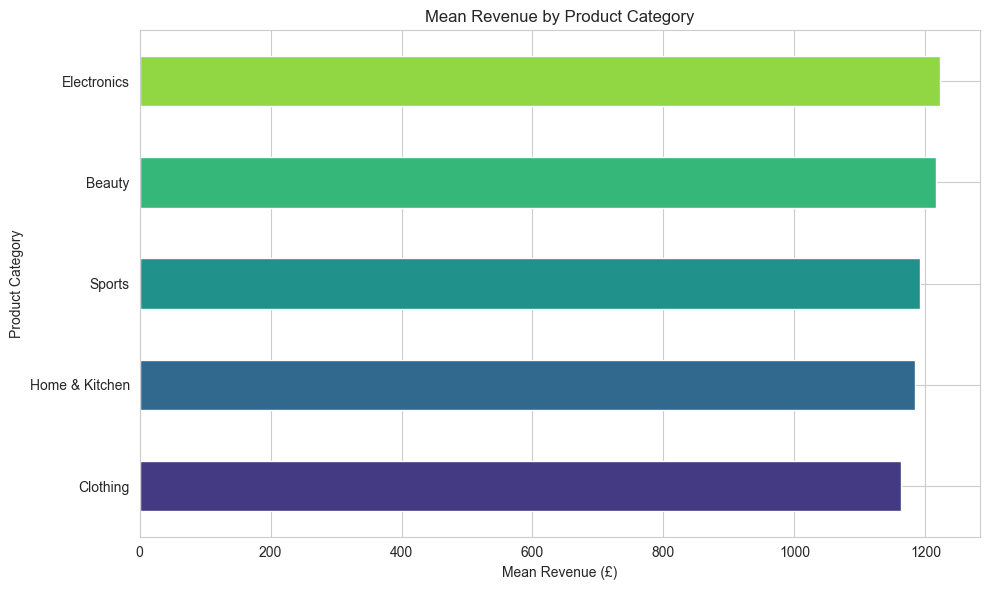

In [64]:
rev_by_cat = df_retail.groupby("Product_Category")["Revenue"].mean().sort_values()

plt.figure(figsize=(10, 6))
rev_by_cat.plot(kind="barh", color=sns.color_palette("viridis", len(rev_by_cat)))
plt.xlabel("Mean Revenue (\u00a3)")
plt.ylabel("Product Category")
plt.title("Mean Revenue by Product Category")
plt.tight_layout()
plt.show()

## Profit Margin Analysis

Compare average profit margins across product categories and customer segments to identify the most and least profitable areas.

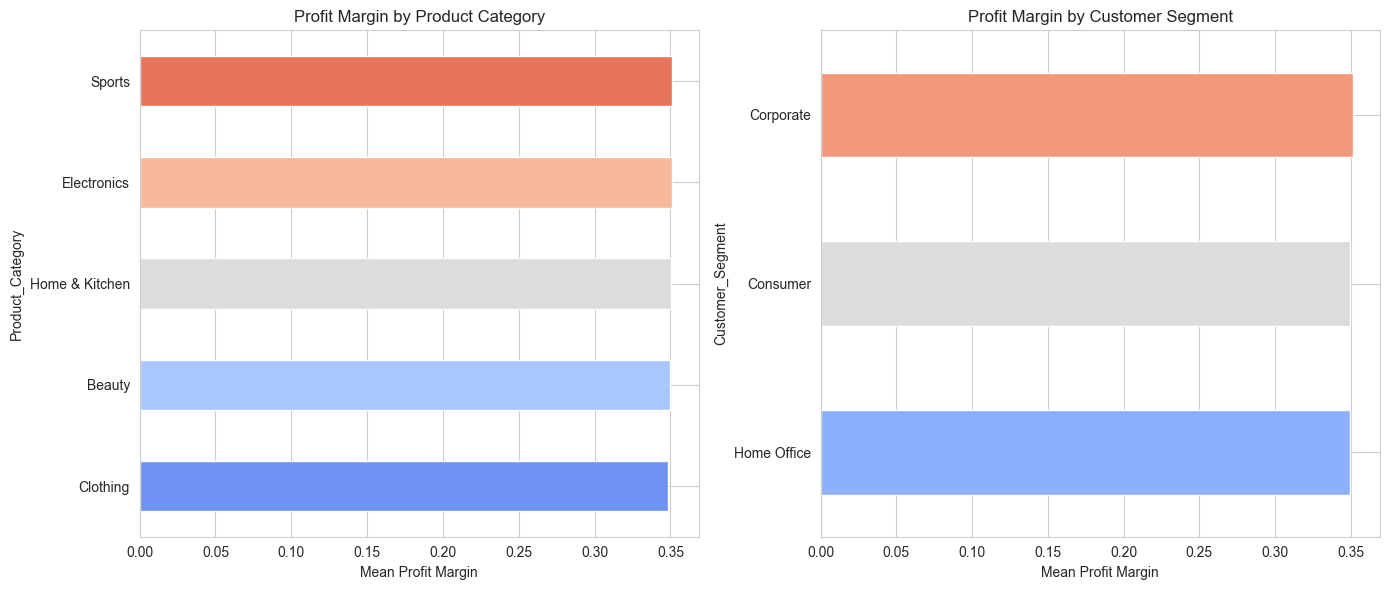

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

margin_by_cat = df_retail.groupby("Product_Category")["Profit_Margin"].mean().sort_values()
margin_by_cat.plot(kind="barh", ax=axes[0], color=sns.color_palette("coolwarm", len(margin_by_cat)))
axes[0].set_title("Profit Margin by Product Category")
axes[0].set_xlabel("Mean Profit Margin")

margin_by_seg = df_retail.groupby("Customer_Segment")["Profit_Margin"].mean().sort_values()
margin_by_seg.plot(kind="barh", ax=axes[1], color=sns.color_palette("coolwarm", len(margin_by_seg)))
axes[1].set_title("Profit Margin by Customer Segment")
axes[1].set_xlabel("Mean Profit Margin")

plt.tight_layout()
plt.show()

## Regional Breakdown

Revenue and profit totals by region, plus a heatmap showing mean revenue across Region and Product Category combinations.

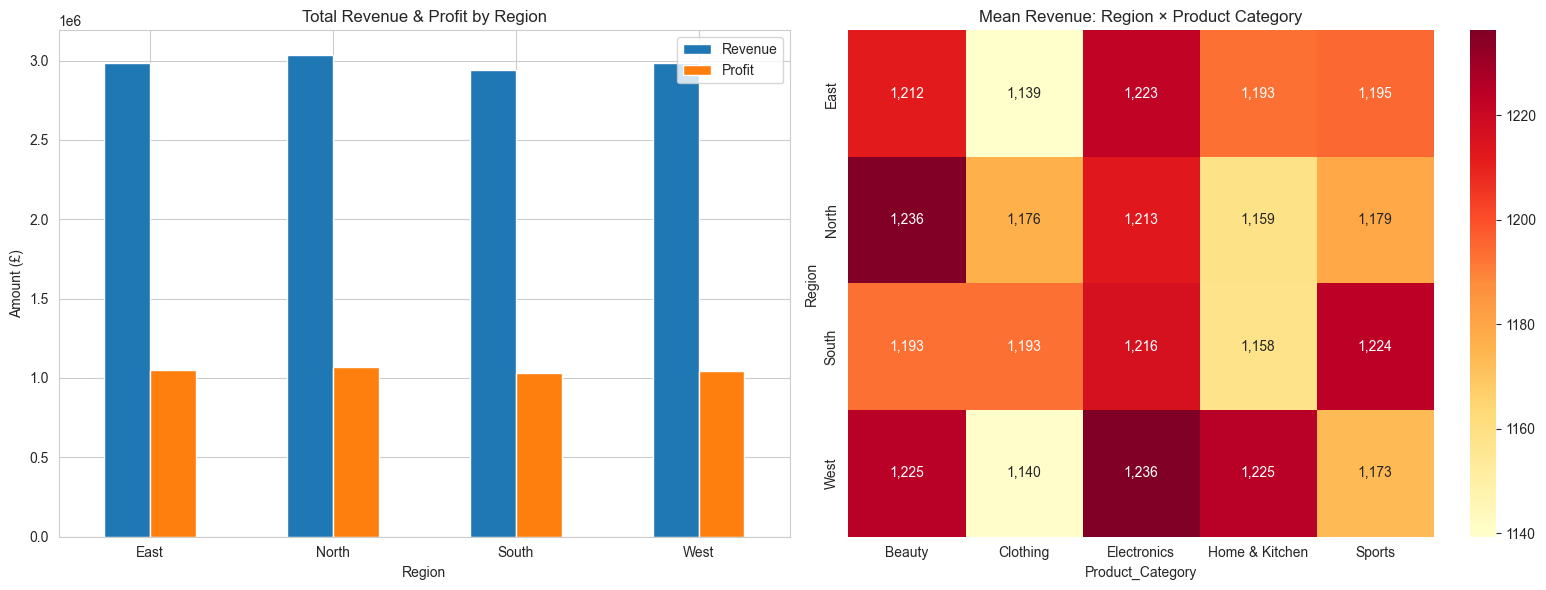

In [66]:
region_stats = df_retail.groupby("Region")[["Revenue", "Profit"]].sum()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

region_stats.plot(kind="bar", ax=axes[0])
axes[0].set_title("Total Revenue & Profit by Region")
axes[0].set_ylabel("Amount (\u00a3)")
axes[0].tick_params(axis="x", rotation=0)

heatmap_data = df_retail.pivot_table(values="Revenue", index="Region",
                                      columns="Product_Category", aggfunc="mean")
sns.heatmap(heatmap_data, annot=True, fmt=",.0f", cmap="YlOrRd", ax=axes[1])
axes[1].set_title("Mean Revenue: Region \u00d7 Product Category")

plt.tight_layout()
plt.show()

## Customer Segment Analysis

Revenue distribution by customer segment and a cross-tabulation of order counts by segment and product category.

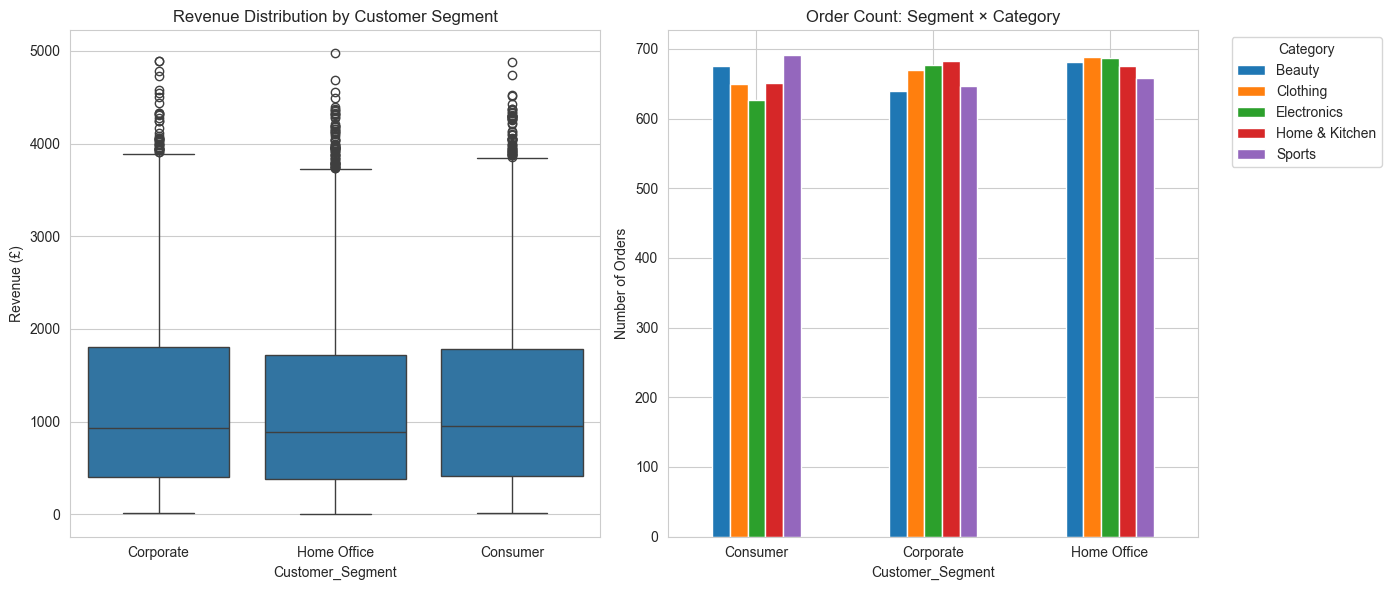

Cross-tabulation of orders:


Product_Category,Beauty,Clothing,Electronics,Home & Kitchen,Sports
Customer_Segment,,,,,
Consumer,675,650,627,651,692
Corporate,640,670,677,682,647
Home Office,681,688,687,675,658


In [67]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df_retail, x="Customer_Segment", y="Revenue", ax=axes[0])
axes[0].set_title("Revenue Distribution by Customer Segment")
axes[0].set_ylabel("Revenue (\u00a3)")

cross_tab = pd.crosstab(df_retail["Customer_Segment"], df_retail["Product_Category"])
cross_tab.plot(kind="bar", ax=axes[1])
axes[1].set_title("Order Count: Segment \u00d7 Category")
axes[1].set_ylabel("Number of Orders")
axes[1].tick_params(axis="x", rotation=0)
axes[1].legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

print("Cross-tabulation of orders:")
display(cross_tab)

## Top Customers

Identify the highest-value and most frequent customers by aggregating revenue, profit, and order count per Customer_ID.

Top 10 Customers by Total Revenue:


,Total_Revenue,Total_Profit,Order_Count,Avg_Order_Value
Customer_ID,,,,
CUST5866,"15,777","4,299",7,"2,254"
CUST6595,"12,927","4,127",9,"1,436"
CUST8532,"11,473","3,110",5,"2,295"
CUST2226,"11,075","3,158",5,"2,215"
CUST1729,"10,962","4,596",6,"1,827"
CUST5950,"10,241","3,805",7,"1,463"
CUST6099,"10,236","3,588",5,"2,047"
CUST1138,"9,996","2,807",4,"2,499"
CUST4758,"9,973","3,240",4,"2,493"


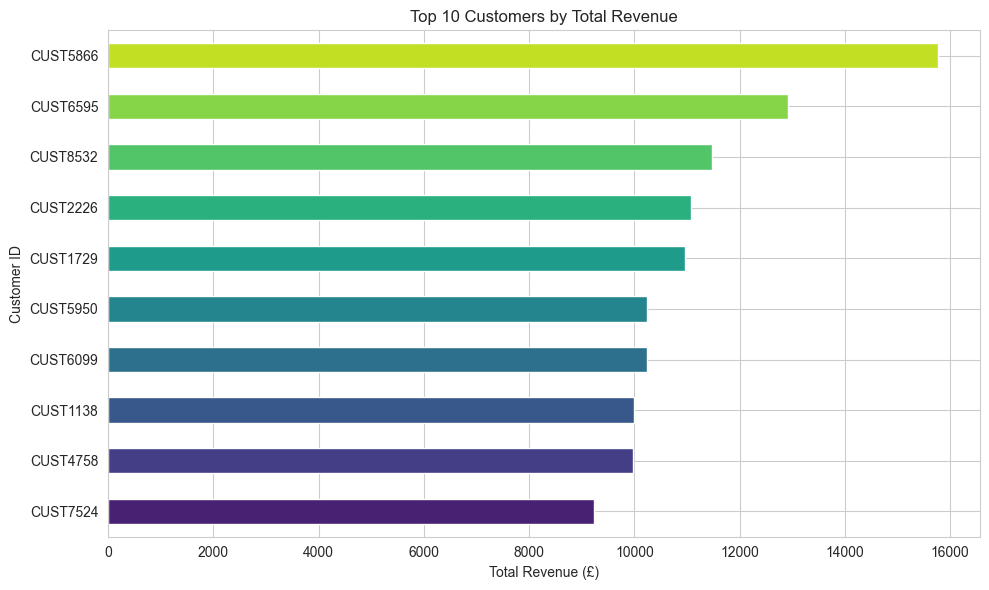

In [68]:
top_revenue = df_retail.groupby("Customer_ID").agg(
    Total_Revenue=("Revenue", "sum"),
    Total_Profit=("Profit", "sum"),
    Order_Count=("Order_ID", "count"),
    Avg_Order_Value=("Revenue", "mean")
).sort_values("Total_Revenue", ascending=False).head(10)

print("Top 10 Customers by Total Revenue:")
display(top_revenue)

plt.figure(figsize=(10, 6))
top_revenue["Total_Revenue"].sort_values().plot(kind="barh", color=sns.color_palette("viridis", 10))
plt.xlabel("Total Revenue (\u00a3)")
plt.ylabel("Customer ID")
plt.title("Top 10 Customers by Total Revenue")
plt.tight_layout()
plt.show()

Top 10 Most Frequent Customers:


,Order_Count,Total_Revenue,Avg_Order_Value
Customer_ID,,,
CUST6595,9,"12,927","1,436"
CUST5950,7,"10,241","1,463"
CUST5866,7,"15,777","2,254"
CUST1729,6,"10,962","1,827"
CUST3286,6,"6,840","1,140"
CUST6207,6,"4,573",762
CUST6505,6,"7,181","1,197"
CUST5039,6,"6,646","1,108"
CUST6199,6,"3,998",666


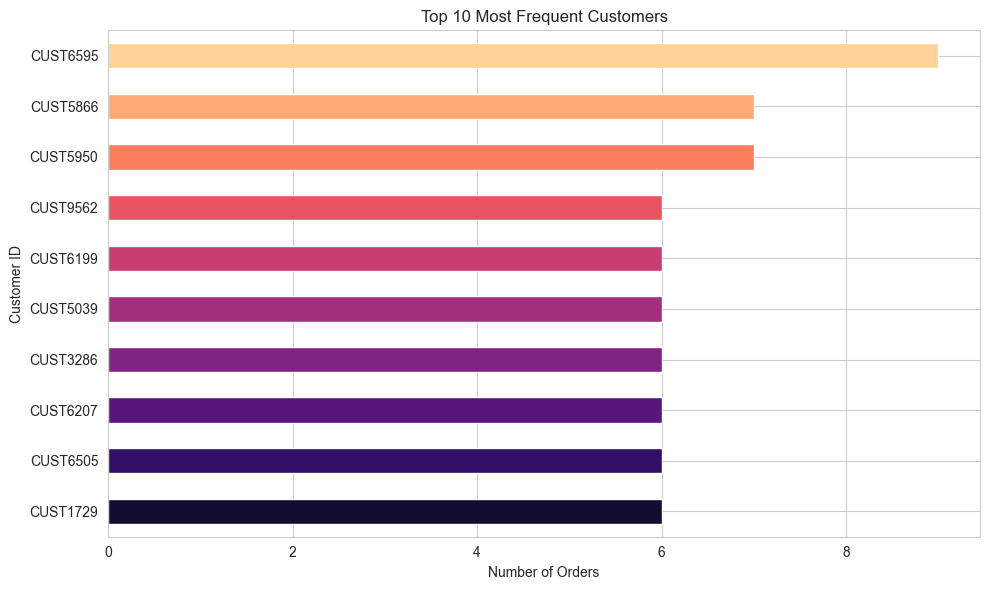

In [69]:
top_frequent = df_retail.groupby("Customer_ID").agg(
    Order_Count=("Order_ID", "count"),
    Total_Revenue=("Revenue", "sum"),
    Avg_Order_Value=("Revenue", "mean")
).sort_values("Order_Count", ascending=False).head(10)

print("Top 10 Most Frequent Customers:")
display(top_frequent)

plt.figure(figsize=(10, 6))
top_frequent["Order_Count"].sort_values().plot(kind="barh", color=sns.color_palette("magma", 10))
plt.xlabel("Number of Orders")
plt.ylabel("Customer ID")
plt.title("Top 10 Most Frequent Customers")
plt.tight_layout()
plt.show()

## Discount Impact on Profitability

Explore the relationship between discount rate and profit margin. A negative correlation would suggest that higher discounts erode margins.

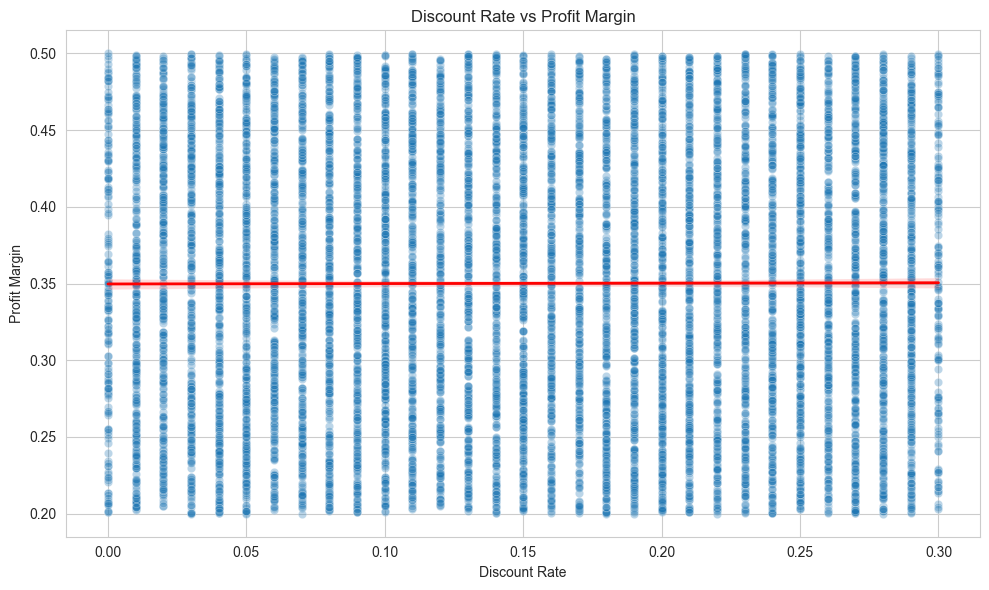

Correlation between Discount Rate and Profit Margin: 0.0026


In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_retail, x="Discount_Rate", y="Profit_Margin", alpha=0.3)
sns.regplot(data=df_retail, x="Discount_Rate", y="Profit_Margin",
            scatter=False, color="red", line_kws={"linewidth": 2})
plt.title("Discount Rate vs Profit Margin")
plt.xlabel("Discount Rate")
plt.ylabel("Profit Margin")
plt.tight_layout()
plt.show()

corr = df_retail["Discount_Rate"].corr(df_retail["Profit_Margin"])
print(f"Correlation between Discount Rate and Profit Margin: {corr:.4f}")

## Time Series Analysis

Monthly trends in revenue and order volume across 2024. Includes breakdowns by product category and seasonal patterns.

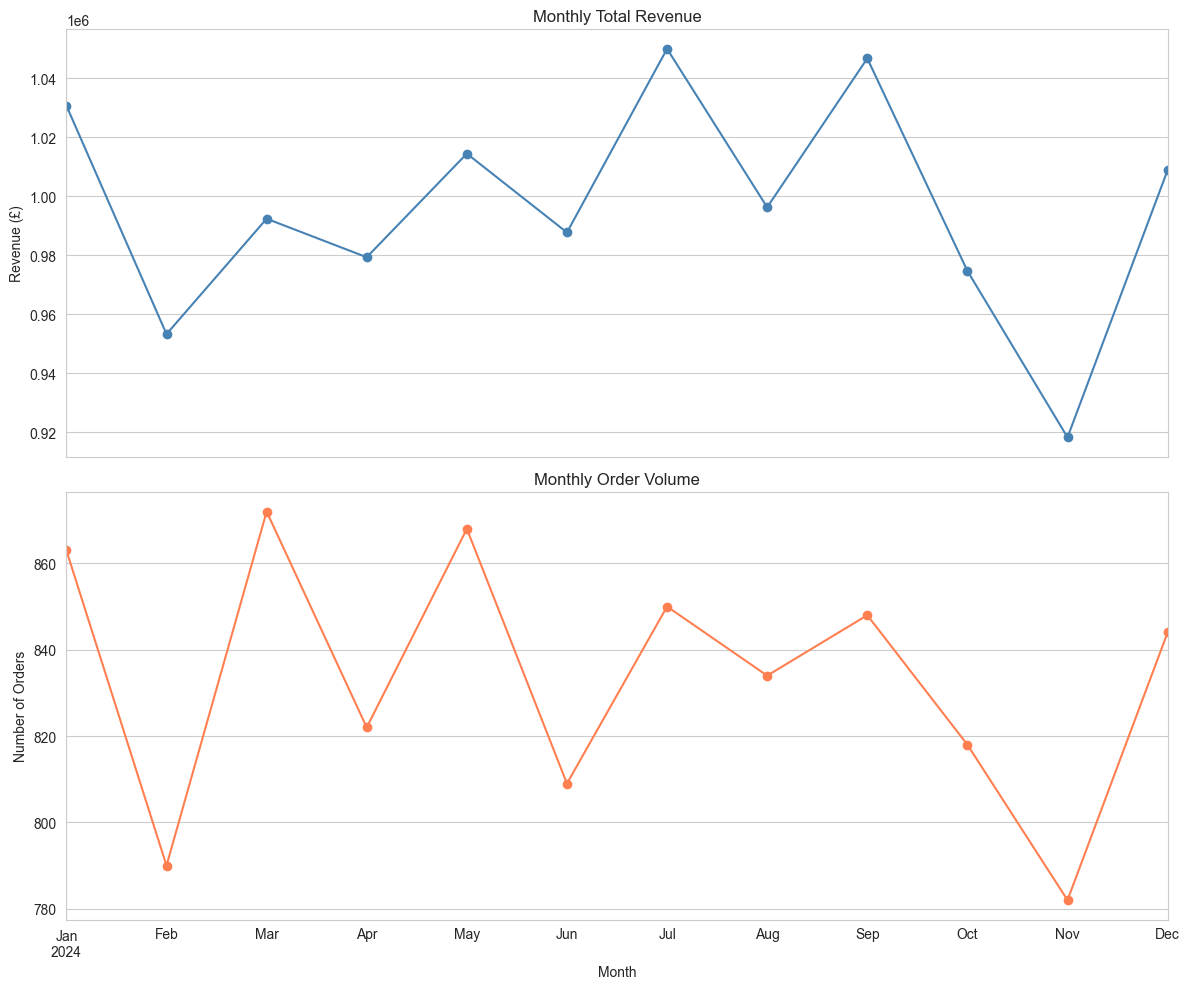

In [71]:
monthly = df_retail.groupby("Year_Month").agg(
    Total_Revenue=("Revenue", "sum"),
    Order_Count=("Order_ID", "count"),
    Avg_Profit_Margin=("Profit_Margin", "mean")
)

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

monthly["Total_Revenue"].plot(ax=axes[0], marker="o", color="steelblue")
axes[0].set_title("Monthly Total Revenue")
axes[0].set_ylabel("Revenue (\u00a3)")

monthly["Order_Count"].plot(ax=axes[1], marker="o", color="coral")
axes[1].set_title("Monthly Order Volume")
axes[1].set_ylabel("Number of Orders")
axes[1].set_xlabel("Month")

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

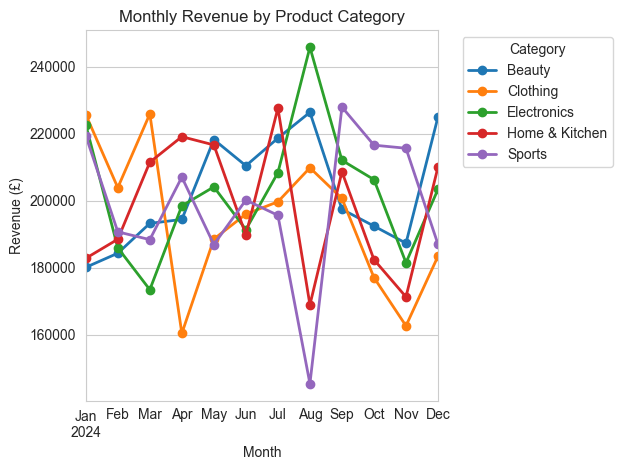

In [72]:
monthly_by_cat = df_retail.groupby(["Year_Month", "Product_Category"])["Revenue"].sum().unstack()

plt.figure(figsize=(12, 6))
monthly_by_cat.plot(marker="o", linewidth=2)
plt.title("Monthly Revenue by Product Category")
plt.ylabel("Revenue (\u00a3)")
plt.xlabel("Month")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

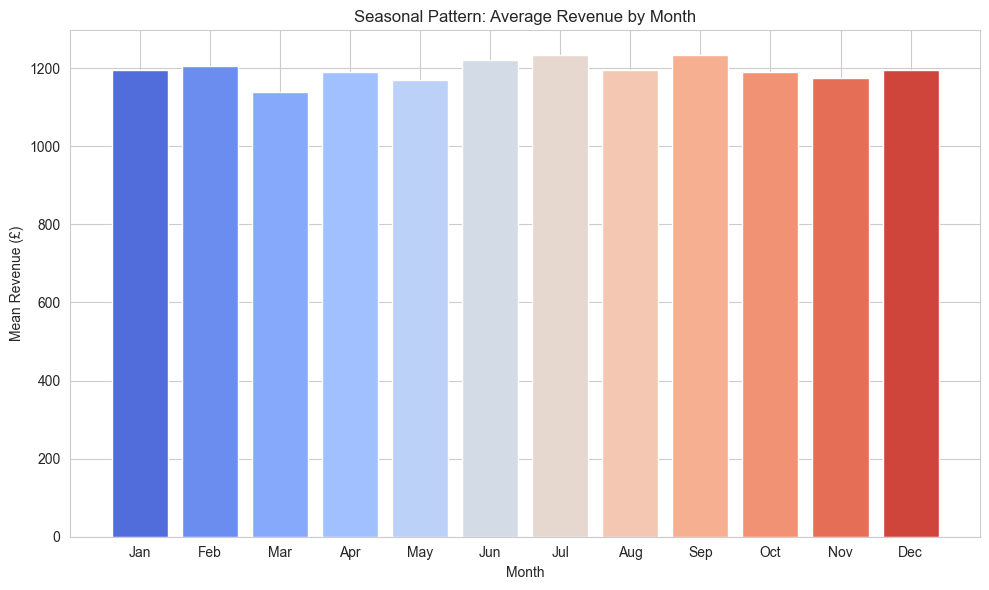

In [73]:
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
seasonal = df_retail.groupby("Month")["Revenue"].mean()

plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), seasonal.values, color=sns.color_palette("coolwarm", 12))
plt.xticks(range(1, 13), month_names)
plt.title("Seasonal Pattern: Average Revenue by Month")
plt.ylabel("Mean Revenue (\u00a3)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

## Payment Method Distribution

Breakdown of orders by payment method.

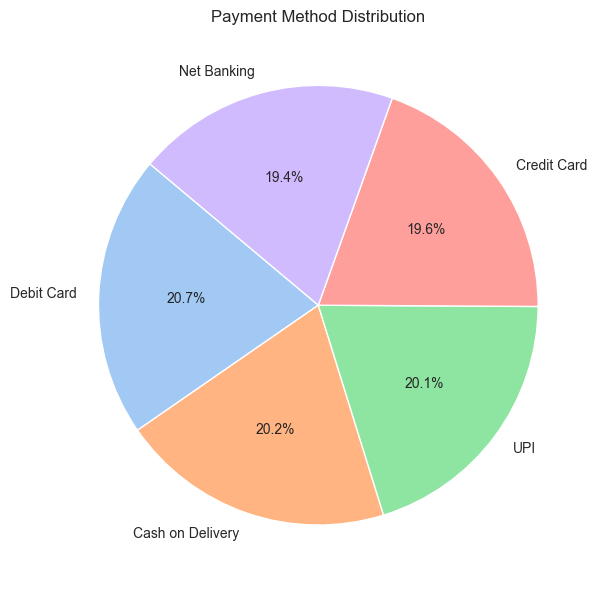

In [74]:
payment_counts = df_retail["Payment_Method"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%",
        colors=sns.color_palette("pastel"), startangle=140)
plt.title("Payment Method Distribution")
plt.tight_layout()
plt.show()

## Summary Statistics by Product Category

Aggregated view: total revenue, total profit, mean profit margin, and order count per product category.

In [75]:
summary = df_retail.groupby("Product_Category").agg(
    Total_Revenue=("Revenue", "sum"),
    Total_Profit=("Profit", "sum"),
    Mean_Margin=("Profit_Margin", "mean"),
    Order_Count=("Order_ID", "count")
).sort_values("Total_Revenue", ascending=False)

summary["Mean_Margin"] = summary["Mean_Margin"].map("{:.2%}".format)
display(summary)

,Total_Revenue,Total_Profit,Mean_Margin,Order_Count
Product_Category,,,,
Electronics,"2,433,318","854,183",35.08%,1991
Beauty,"2,427,867","845,766",34.99%,1996
Sports,"2,380,620","831,067",35.13%,1997
Home & Kitchen,"2,377,096","843,057",35.05%,2008
Clothing,"2,333,518","815,424",34.82%,2008


# Conclusions

**London Houses Dataset**
- Price correlates perfectly with square meters (r = 1.000) — categorical features (property type, building status, view) show no independent effect.
- **Chelsea** is the most expensive neighborhood at £16,723/m²; **Greenwich** is the cheapest at £8,296/m².
- Prices range from £387K (small apartments) to £4.98M (large detached houses).

**Retail Business Dataset**
- Mean revenue is nearly identical across all 5 categories (~£1,162–£1,222), with profit margins consistent at ~35%.
- No meaningful seasonal trends — revenue and order volume remain flat throughout 2024.
- Payment methods and customer segments are evenly distributed.

> Both datasets are synthetic — the analyses above are a technical exercise in pandas and seaborn.